In [1]:
%matplotlib inline
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sys import path
import os
import pandas as pd
from os.path import dirname as dir
from utils import plot_df
if __name__ == "__main__" and __package__ is None:
    path.append(dir(os.path.join("..", "ExKMC")))
    path.append(dir(os.path.join("..", "KDTree")))
    from ExKMC.CTree import Tree
    from KDTree.KDTree import KDTree
    from ExKMC.utils import calc_score

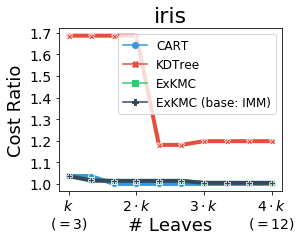

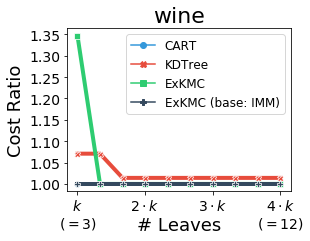

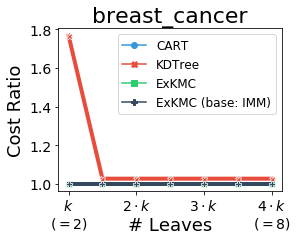

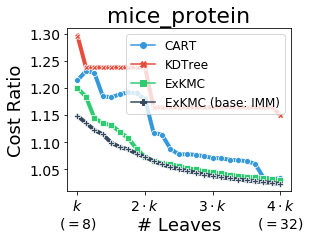

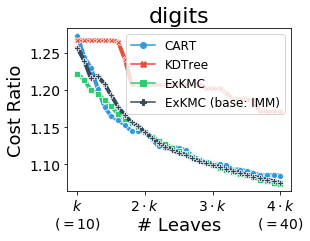

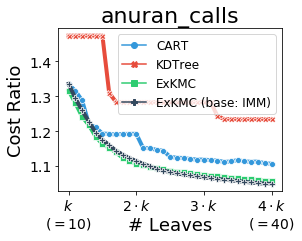

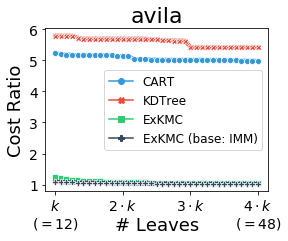

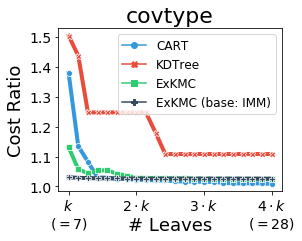

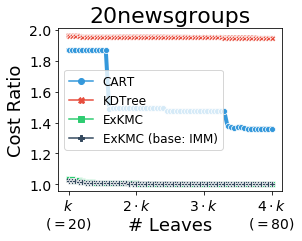

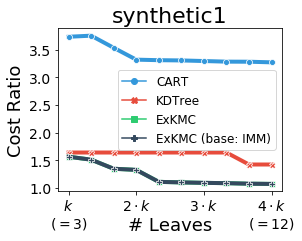

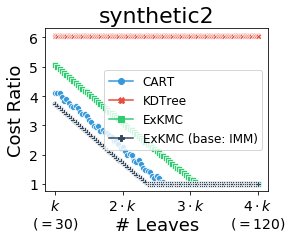

In [2]:
data_dir = os.path.join("..", "input", "csvs")

ds = [('iris', 3),
      ('wine', 3),
      ('breast_cancer', 2),
      ('mice_protein', 8),
      ('digits', 10),
      ('anuran_calls', 10),
      ('avila', 12),
      ('covtype', 7),
      ('20newsgroups', 20),
      ('synthetic1', 3),
      ('synthetic2', 30)]

for d in ds:
    dataset = d[0]
    k = d[1]
    X = pd.read_csv(os.path.join(data_dir, dataset + '.csv')).values

    kmeans = KMeans(k)
    kmeans.fit(X)
    kmeans_score = -1 * kmeans.score(X)

    leaves_range = np.arange(k, 4 * k + 1)

    ExKMC_IMM_base_costs = []
    ExKMC_no_base_costs = []
    KDTree_costs = []
    CART_costs = []

    for max_leaves in leaves_range:
        ######### ExKMC_IMM_base #########
        tree = Tree(k, max_leaves=max_leaves)
        tree.fit(X, kmeans)
        tree_score = tree.score(X)
        ExKMC_IMM_base_costs.append(tree_score)

        ######### ExKMC_no_base #########
        tree = Tree(k, max_leaves=max_leaves, base_tree="NONE")
        tree.fit(X, kmeans)
        tree_score = tree.score(X)
        ExKMC_no_base_costs.append(tree_score)

        ######### CART #########
        tree = DecisionTreeClassifier(max_leaf_nodes=max_leaves)
        tree.fit(X, kmeans.predict(X))
        clusters = tree.predict(X)
        decision_tree_cost = calc_score(X, clusters, k)
        CART_costs.append(decision_tree_cost)

        ######### KDTree #########
        tree = KDTree(leaf_size=int(X.shape[0] / max_leaves))
        tree.fit(X)
        kdtree_cost = tree.score(X, kmeans.cluster_centers_)
        KDTree_costs.append(kdtree_cost)

    df = pd.DataFrame()
    df['leaves'] = leaves_range
    df['CART'] = CART_costs / kmeans_score
    df['KDTree'] = KDTree_costs / kmeans_score
    df['ExKMC'] = ExKMC_no_base_costs / kmeans_score
    df['ExKMC (base: IMM)'] = ExKMC_IMM_base_costs / kmeans_score
    plot_df(df, dataset)
    plt.show()